In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df = pd.read_csv('data.csv', encoding = "ISO-8859-1")

c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.fillna(0, inplace=True)
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01


In [4]:
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['si']=df['so2'].apply(calculate_si)
df1= df[['so2','si']]
df1.head()

,so2,si
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [5]:
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['ni']=df['no2'].apply(calculate_ni)
df1= df[['no2','ni']]
df1.head()

,no2,ni
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [6]:
def calculate_(rspm):
    rpi=0
    if(rspm<=30):
     rpi=rspm*50/30
    elif(rspm>30 and rspm<=60):
     rpi=50+(rspm-30)*50/30
    elif(rspm>60 and rspm<=90):
     rpi=100+(rspm-60)*100/30
    elif(rspm>90 and rspm<=120):
     rpi=200+(rspm-90)*100/30
    elif(rspm>120 and rspm<=250):
     rpi=300+(rspm-120)*(100/130)
    else:
     rpi=400+(rspm-250)*(100/130)
    return rpi
df['rpi']=df['rspm'].apply(calculate_si)
df1= df[['rspm','rpi']]
df1.tail()

,rspm,rpi
435737,143.0,121.000000
435738,171.0,130.333333
435739,0.0,0.000000
435740,0.0,0.000000
435741,0.0,0.000000


In [7]:
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
df['spi']=df['spm'].apply(calculate_spi)
df1= df[['spm','spi']]
df1.tail()

,spm,spi
435737,0.0,0.0
435738,0.0,0.0
435739,0.0,0.0
435740,0.0,0.0
435741,0.0,0.0


In [8]:
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
df['AQI']=df.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)

df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date,si,ni,rpi,spi,AQI
0,150,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0,0.0,1990-02-01,6.000,21.750,0.0,0.0,21.750
1,151,February - M021990,Andhra Pradesh,Hyderabad,0,Industrial Area,3.1,7.0,0.0,0.0,0,0.0,1990-02-01,3.875,8.750,0.0,0.0,8.750
2,152,February - M021990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0,0.0,1990-02-01,7.750,35.625,0.0,0.0,35.625
3,150,March - M031990,Andhra Pradesh,Hyderabad,0,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0,0.0,1990-03-01,7.875,18.375,0.0,0.0,18.375
4,151,March - M031990,Andhra Pradesh,Hyderabad,0,Industrial Area,4.7,7.5,0.0,0.0,0,0.0,1990-03-01,5.875,9.375,0.0,0.0,9.375


In [9]:
df1 = df.drop(columns=['stn_code', 'sampling_date','location','agency','type','location_monitoring_station','pm2_5','so2','no2','rspm','spm'])

In [10]:
df1.head()

,state,date,si,ni,rpi,spi,AQI
0,Andhra Pradesh,1990-02-01,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,1990-02-01,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,1990-02-01,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,1990-03-01,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,1990-03-01,5.875,9.375,0.0,0.0,9.375


In [11]:
df1['month'] = pd.DatetimeIndex(df1['date']).month
df1.head()

,state,date,si,ni,rpi,spi,AQI,month
0,Andhra Pradesh,1990-02-01,6.000,21.750,0.0,0.0,21.750,2
1,Andhra Pradesh,1990-02-01,3.875,8.750,0.0,0.0,8.750,2
2,Andhra Pradesh,1990-02-01,7.750,35.625,0.0,0.0,35.625,2
3,Andhra Pradesh,1990-03-01,7.875,18.375,0.0,0.0,18.375,3
4,Andhra Pradesh,1990-03-01,5.875,9.375,0.0,0.0,9.375,3


In [12]:
def calculate_fest(month):
    fest=0
    if(month==5 or month == 11 or month ==12):
     fest=1
    return fest
df1['fest']=df1['month'].apply(calculate_fest)

df1.tail()

,state,date,si,ni,rpi,spi,AQI,month,fest
435737,West Bengal,2015-12-24,27.5,95.0,121.000000,0.0,121.000000,12,1
435738,West Bengal,2015-12-29,25.0,90.0,130.333333,0.0,130.333333,12,1
435739,andaman-and-nicobar-islands,0,0.0,0.0,0.000000,0.0,0.000000,1,0
435740,Lakshadweep,0,0.0,0.0,0.000000,0.0,0.000000,1,0
435741,Tripura,0,0.0,0.0,0.000000,0.0,0.000000,1,0


In [13]:
df1.head()

,state,date,si,ni,rpi,spi,AQI,month,fest
0,Andhra Pradesh,1990-02-01,6.000,21.750,0.0,0.0,21.750,2,0
1,Andhra Pradesh,1990-02-01,3.875,8.750,0.0,0.0,8.750,2,0
2,Andhra Pradesh,1990-02-01,7.750,35.625,0.0,0.0,35.625,2,0
3,Andhra Pradesh,1990-03-01,7.875,18.375,0.0,0.0,18.375,3,0
4,Andhra Pradesh,1990-03-01,5.875,9.375,0.0,0.0,9.375,3,0


In [14]:
import sklearn
from sklearn.preprocessing import Normalizer
le = sklearn.preprocessing.LabelEncoder()
df1['state'] = le.fit_transform(df1['state'])
df['date'] = pd.to_datetime(df['date'])

In [15]:
df1.columns


Index(['state', 'date', 'si', 'ni', 'rpi', 'spi', 'AQI', 'month', 'fest'], dtype='object')

In [16]:
df1 = df1.drop(['date'],axis=1)

In [17]:
df1.dtypes

state      int32
si       float64
ni       float64
rpi      float64
spi      float64
AQI      float64
month      int64
fest       int64
dtype: object

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(df1))

StandardScaler(copy=True, with_mean=True, with_std=True)


c:\users\sagar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [19]:
X = df1.drop(columns=['AQI'])

In [20]:
X.shape


(435742, 7)

In [21]:
y = df1['AQI']

In [22]:
y.shape

(435742,)

In [23]:
X.shape

(435742, 7)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
X_train.shape

(326806, 7)

In [26]:
X_test.shape

(108936, 7)

In [27]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.9287616290793195

In [28]:
corrMatrix = df1.corr()
print (corrMatrix)

          state        si        ni       rpi       spi       AQI     month  \
state  1.000000  0.090062  0.235752  0.125487  0.091523  0.153444  0.003390   
si     0.090062  1.000000  0.389163  0.086205  0.122313  0.165565 -0.017842   
ni     0.235752  0.389163  1.000000  0.266044  0.200483  0.294656 -0.006638   
rpi    0.125487  0.086205  0.266044  1.000000  0.165027  0.383961 -0.016769   
spi    0.091523  0.122313  0.200483  0.165027  1.000000  0.932234 -0.023455   
AQI    0.153444  0.165565  0.294656  0.383961  0.932234  1.000000 -0.030350   
month  0.003390 -0.017842 -0.006638 -0.016769 -0.023455 -0.030350  1.000000   
fest   0.010367  0.015243  0.035552  0.064727  0.032963  0.051367  0.466916   

           fest  
state  0.010367  
si     0.015243  
ni     0.035552  
rpi    0.064727  
spi    0.032963  
AQI    0.051367  
month  0.466916  
fest   1.000000  


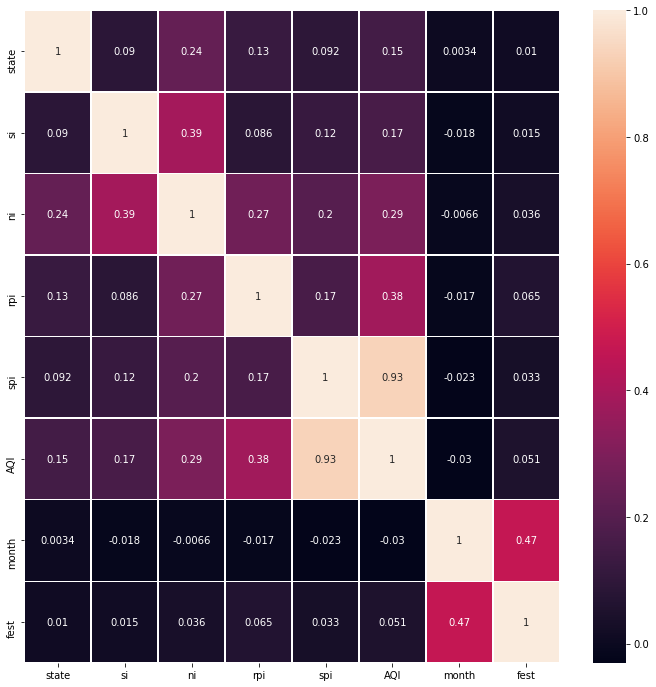

In [29]:
import seaborn as sn
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,12))
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [30]:
from sklearn.metrics import r2_score

predict=reg.predict(X_test)
r2_score(y_test,predict)



0.9287616290793195

In [31]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,predict)))

31.787058138742676


In [32]:
df7 = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
df7 = df7.sort_values(by=['Actual'])
df7.tail()

,Actual,Predicted
320363,1778.75,1300.454782
332899,2381.25,1873.787867
332779,2495.00,1917.144582
332783,2968.75,2331.577102
321441,3125.00,2393.244500


In [33]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)
predict1 = neigh.predict(X_test)


In [34]:
print(np.sqrt(mean_squared_error(y_test,predict1)))


3.9153915454572408


In [35]:
df6 = pd.DataFrame({'Actual': y_test, 'Predicted': predict1})
df6.head()

,Actual,Predicted
431012,133.660000,134.666667
403130,138.333333,138.555556
179429,0.000000,0.000000
305174,56.250000,56.666667
33048,151.333333,150.777778


In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
regressor = DecisionTreeRegressor(random_state=0, max_depth =5)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [38]:
X_train.shape

(326806, 7)

In [39]:
predict2 = regressor.predict(X_test)

In [40]:
print(np.sqrt(mean_squared_error(y_test,predict2)))


13.705385941802904


In [41]:
df5 = pd.DataFrame({'Actual': y_test, 'Predicted': predict2})
df5.head()

,Actual,Predicted
431012,133.660000,145.016188
403130,138.333333,145.016188
179429,0.000000,36.593933
305174,56.250000,66.790246
33048,151.333333,145.016188


In [42]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, n_estimators =100,random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [43]:
predict3 = regr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,predict3)))


12.817784695723468


In [44]:
predict3

array([144.74253082, 144.74253082,  36.60435851, ..., 144.74253082,
        36.60435851, 108.17302389])

In [45]:
df4 = pd.DataFrame({'Actual': y_test, 'Predicted': predict3})
df4.head()

,Actual,Predicted
431012,133.660000,144.742531
403130,138.333333,144.742531
179429,0.000000,36.604359
305174,56.250000,66.331585
33048,151.333333,144.742531


In [46]:
X_train.shape

(326806, 7)

In [47]:
X_test.shape

(108936, 7)

In [48]:
import statsmodels.api as sm
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [49]:
RF = RandomForestRegressor(n_estimators = 100, random_state=555)
KNC = KNeighborsRegressor()
DTC = DecisionTreeRegressor()
ABC = AdaBoostRegressor(n_estimators = 100)
BC = BaggingRegressor(n_estimators = 100)
GBC = GradientBoostingRegressor(n_estimators = 100)
reg5s = []
print('5-fold cross validation:\n')
for reg5, label in zip([RF, KNC, DTC, ABC, BC, GBC],
                      ['Random Forest',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting',
                      ]):
    scores = sklearn.model_selection.cross_val_score(reg5, X_train, y_train, cv=5, scoring='r2')
    print("Train CV Accuracy: %0.3f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
    md = reg5.fit(X_train, y_train)
    reg5s.append(md)
    print("Test Accuracy: %0.4f " % (np.sqrt((sklearn.metrics.mean_squared_error(reg5.predict(X_test), y_test)))))

5-fold cross validation:

Train CV Accuracy: 0.999 (+/- 0.001) [Random Forest]
Test Accuracy: 2.8042 
Train CV Accuracy: 0.999 (+/- 0.001) [KNeighbors]
Test Accuracy: 4.1966 
Train CV Accuracy: 0.999 (+/- 0.001) [Decision Tree]
Test Accuracy: 8.4529 
Train CV Accuracy: 0.860 (+/- 0.020) [Ada Boost]
Test Accuracy: 47.2900 
Train CV Accuracy: 0.999 (+/- 0.001) [Bagging]
Test Accuracy: 2.7814 
Train CV Accuracy: 0.998 (+/- 0.001) [Gradient Boosting]
Test Accuracy: 5.4016 


In [50]:
from mlens.ensemble import SuperLearner
from mlens.model_selection import Evaluator
from mlens.metrics import make_scorer

from sklearn.metrics import accuracy_score

[MLENS] backend: threading


In [51]:
ensemble = SuperLearner(scorer=mean_squared_error, random_state=555, verbose=2)
ensemble.add([KNC, DTC])


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...87ECC18>)],
   n_jobs=-1, name='group-0', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function mean_squared_error at 0x000002EDB87ECC18>,
       shuffle=False, verbose=2)

In [52]:
ensemble.add_meta(DecisionTreeRegressor())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...87ECC18>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function mean_squared_error at 0x000002EDB87ECC18>,
       shuffle=False, verbose=2)

In [53]:
ensemble.fit(X_train, y_train)


Fitting 2 layers
Processing layer-1             done | 00:02:56
Processing layer-2             done | 00:00:00
Fit complete                        | 00:02:57


SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=4782, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...87ECC18>)],
   n_jobs=-1, name='group-1', raise_on_exception=True, transformers=[])],
   verbose=1)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=555, sample_size=20,
       scorer=<function mean_squared_error at 0x000002EDB87ECC18>,
       shuffle=False, verbose=2)

In [54]:
X_train.shape

(326806, 7)

In [55]:

y_pred = ensemble.predict(X_train)
y_pred.shape


Predicting 2 layers
Processing layer-1             done | 00:00:22
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:22


(326806,)

In [56]:
X_test.shape

(108936, 7)

In [57]:
print ("Accuracy - Train : ", np.sqrt((sklearn.metrics.mean_squared_error(ensemble.predict(X_train), y_train))))
print ("Accuracy - Test : ", np.sqrt(sklearn.metrics.mean_squared_error(y_test,ensemble.predict(X_test))))


Predicting 2 layers
Processing layer-1             done | 00:00:21
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:22
Accuracy - Train :  3.1992766900416516

Predicting 2 layers
Processing layer-1             done | 00:00:07
Processing layer-2             done | 00:00:00
Predict complete                    | 00:00:07
Accuracy - Test :  3.623291554117272


In [58]:
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
X_train, y_train = make_regression(n_samples=100, n_features=4,
                       n_informative=2, n_targets=1,
                       random_state=0, shuffle=False)
regr1 = BaggingRegressor(n_estimators=10, random_state=0).fit(X_train, y_train)

In [59]:
results = cross_val_score (regr1, X_train, y_train, cv = 5)

In [60]:
results

array([0.93681534, 0.90468806, 0.94626184, 0.91545354, 0.90819453])